In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoost


In [5]:
df = pd.read_csv('data/stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
x = df.drop('math_score',axis=1)

In [8]:
y = df['math_score']

In [ ]:
for col in df.columns:
    print(df[col].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

In [17]:
processor = ColumnTransformer(
    [
        ('OneHotEncoder',OneHotEncoder(),cat_features),
        ('StandardScaler',StandardScaler(),num_features),
    ]
)

In [18]:
x = processor.fit_transform(x)

In [20]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.044215,1.774157
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.970952,-0.859491
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.125472,-0.201079
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.605158,0.589015


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [31]:
def estimator(true,predict):
    score = r2_score(true,predict)
    mse = mean_squared_error(true,predict)
    mae = mean_absolute_error(true,predict)
    rmse = np.sqrt(mse)
    return score,mse,mae,rmse

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def estimator(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, mae, rmse

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoost': CatBoost()  
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(x_train, y_train)

    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    score_train, mse_train, mae_train, rmse_train = estimator(y_train, y_train_predict)
    score_test, mse_test, mae_test, rmse_test = estimator(y_test, y_test_predict)

    model_list.append(name)
    r2_list.append(score_test)

    print("===================================================")
    print(f"Model: {name}")
    
    print("Training prediction:")
    print("MAE:", mae_train)
    print("MSE:", mse_train)
    print("R² Score:", score_train)
    print("RMSE:", rmse_train)

    print("----------------------------------------")

    print("Testing prediction:")
    print("MAE:", mae_test)
    print("MSE:", mse_test)
    print("R² Score:", score_test)
    print("RMSE:", rmse_test)


Model: LinearRegression
Training prediction:
MAE: 4.26708984375
MSE: 28.34850036621094
R² Score: 0.8742567465397689
RMSE: 5.32433097827426
----------------------------------------
Testing prediction:
MAE: 4.2158203125
MSE: 29.116678771972655
R² Score: 0.8803449074540941
RMSE: 5.3959872842671395
Model: Ridge
Training prediction:
MAE: 4.264987823725981
MSE: 28.33778823308244
R² Score: 0.8743042615212909
RMSE: 5.323324922741654
----------------------------------------
Testing prediction:
MAE: 4.211100688014261
MSE: 29.056272192348306
R² Score: 0.8805931485028737
RMSE: 5.39038701693564
Model: Lasso
Training prediction:
MAE: 5.206302661246526
MSE: 43.47840400585579
R² Score: 0.8071462015863456
RMSE: 6.593815587795566
----------------------------------------
Testing prediction:
MAE: 5.157881810347763
MSE: 42.5064168384116
R² Score: 0.8253197323627853
RMSE: 6.519694535667419
Model: SVR
Training prediction:
MAE: 4.869189452384867
MSE: 43.257024268031365
R² Score: 0.8081281585902299
RMSE: 6.577

In [59]:

summary_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2_score'])
summary_df = summary_df.sort_values(by='R2_score', ascending=False).reset_index(drop=True)

print("\n=========== Model Performance Summary (R² Score) ===========")
print(summary_df)



=========== Model Performance Summary (R² Score) ===========
                       Model  R2_score
0                      Ridge  0.880593
1           LinearRegression  0.880345
2  GradientBoostingRegressor  0.872041
3                   CatBoost  0.851632
4      RandomForestRegressor  0.848878
5               XGBRegressor  0.827797
6                      Lasso  0.825320
7                        KNN  0.783813
8      DecisionTreeRegressor  0.747985
9                        SVR  0.728600


In [60]:
linear = LinearRegression(n_jobs=-1)
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)


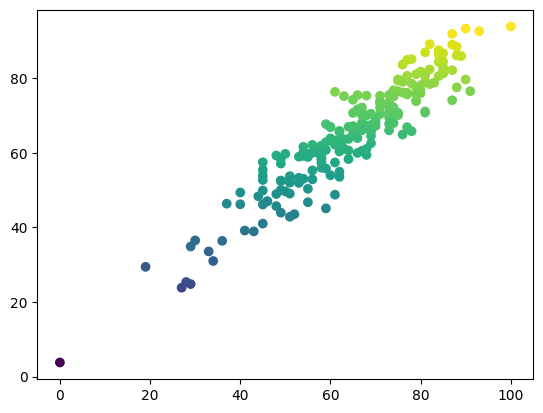

In [70]:
plt.scatter(y_test,y_pred,c = y_pred)

<Axes: xlabel='math_score'>

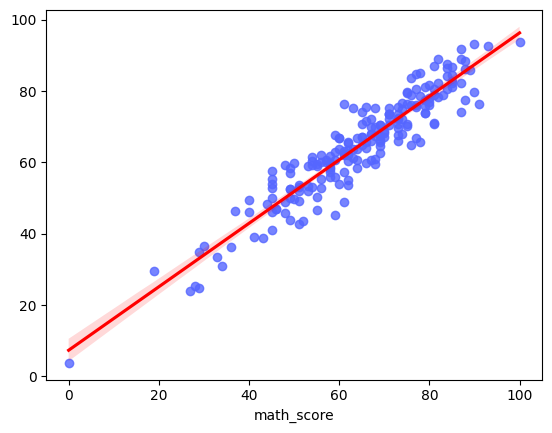

In [82]:
sns.regplot(x = y_test,y = y_pred,line_kws={'color':'red'},color='#56FA')

In [83]:
pd.DataFrame({'y_pred':y_pred,'y_test':y_test,'difference':y_test-y_pred})

,y_pred,y_test,difference
521,76.507812,91,14.492188
737,58.953125,53,-5.953125
740,76.960938,80,3.039062
660,76.757812,74,-2.757812
411,87.539062,84,-3.539062
...,...,...,...
408,43.546875,52,8.453125
332,62.031250,62,-0.031250
208,67.976562,74,6.023438
613,67.132812,65,-2.132812
